In [1]:
# !pip install tensorflow==1.14.0
# !pip install tensorflow-gpu==1.14.0

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [3]:
data = pd.read_csv('international-airline-passengers.csv',usecols=[1])

In [4]:
data.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


# Data Preprocessing

In [10]:
values = data.values.astype('float32')

In [11]:
train_size = int((values.shape[0]*0.67))
test_size = values.shape[0]-train_size
train = values[0:train_size]
test = values[train_size:]

In [12]:
scaler = MinMaxScaler(feature_range=(0,1)) #Scale data between 0 to 
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [13]:
#create dataset for RNN
def create_dataset(data,k):
  dataX,dataY = [],[]
  for i in range(data.shape[0]-k):
    x = data[i:i+k,0]
    y = data[i+k,0]
    dataX.append(x)
    dataY.append(y)
  return np.array(dataX),np.array(dataY)

In [19]:
look_back = 12
trainX,trainY = create_dataset(train,look_back)
testX,testY = create_dataset(test,look_back)

#Rnn function used is tanh and simple RNN implementation is used

In [22]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [29]:
trainX.shape #it's a 2D shape but RNN require a 3D shape 
#Reshaping the Data
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1)) # we add 1 to make it 3d
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(84, 12, 1)

In [28]:
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1))) #input_shape means at any give interval how many data we want to pass
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1)

Epoch 1/100
84/84 [==============================] - 1s 2ms/step - loss: 0.0197
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 10/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 11/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 12/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 13/100
84/84 [=================

# It's using Backpropagation using previous states to improve on Our loss function

# Analysing The RNN Outcome

In [37]:
#predicting on testing data
testPredict = model.predict(testX)
#un-scaling the data
testPredict = scaler.inverse_transform(testPredict).ravel() #ravel we use to convert 2d data into 1d data
testPredict.shape

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel() #putting [] around trainY to make it 2D 

testPredict.shape,testTrue.shape

((36,), (36,))

# Plotting the Data

In [38]:
import matplotlib.pyplot as plt

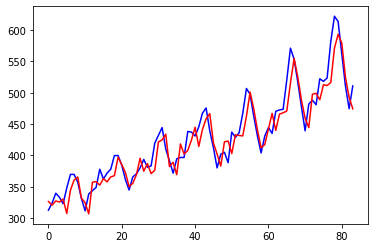

In [43]:
plt.plot(trainTrue,c='b')
plt.plot(trainPredict,c='r')
plt.show()

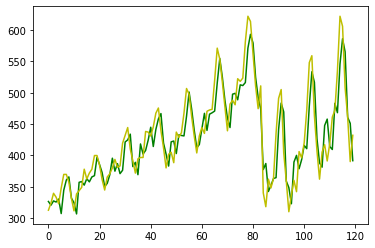

In [45]:
#combined prediction
combinedPredicted = np.concatenate((trainPredict,testPredict))
combinedTrue = np.concatenate((trainTrue,testTrue))
plt.plot(combinedPredicted,c='g')
plt.plot(combinedTrue,c='y')
plt.show()

# Seems like till 84 we are going to give a closer match but after 84 it'll not do that much better job but for a simple RNN this is pretty good job We try to improve it Using LSTM